# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one, get one free). Some users might not receive any offer during certain weeks.

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer a type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product, whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars to get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10-day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the offer did not influence the customer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10-dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer a type. Or you could build a model that predicts whether someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).


# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and metadata about each offer (duration, type, etc.)
* profile.json—demographic data for each customer
* transcript.json—records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string)—type of offer i.e., BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int)—reward given for completing an offer
* duration (int)- time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int)- age of the customer
* became_member_on (int)- date when customer created an app account
* gender (str)- gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (i.e. transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int)- time in hours since the start of test. The data begins at time t=0
* value - (dict of strings)- either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the terminal from the orange icon in the top left of this notebook.

You can see how to access the terminal and how the installation works using the two images below.  First, you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

# Overview

#Problem description
In this project we want to analyze three different datasets containing data from members of Starbucks, in order to understand the influence of different types of offers in the branch client's behaviour.
We will work with three different datasets: portfolio, profile and transcript.json.

#Analysis Strategy
Our aim is to understand how offers incluence the users. To do that, we will work with the provider datasets to discover features that help us understand the situation. Such as, demographic groups, differences between users, different offers and transactions.
After that we will build a clasification model to understand how customers respond to the different offers.

We will carry out an exploratory analysis of the datasets, cleaning of the data, create an ML model, train the model, evaluate and enhance the properties of the models and be able to predict the response of the users.




In [155]:
# Import libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from subprocess import call
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from scipy.stats import uniform
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
warnings.filterwarnings('ignore')
%matplotlib inline

#Read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

#Create a copy to preserve the original files
portfolio_copy = portfolio.copy()
profile_copy = profile.copy()
transcript_copy = transcript.copy()


In [156]:
#Check profile dataframe
profile.head(5)

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [157]:
#Check portfolio dataframe
portfolio.head(5)

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [158]:
#Check transcript dataframe
transcript.head(5)

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


## Analyzing 'profile' dataset
Profile dataset contains the demographic data for each customer. This dataset can help us get an idea of our customers and create different customer's groups.

In [159]:
#Summary of profile dataset
profile.describe(include='all')

,gender,age,id,became_member_on,income
count,14825,17000.000000,17000,1.700000e+04,14825.000000
unique,3,NaN,17000,NaN,NaN
top,M,NaN,68be06ca386d4c31939f3a4f0e3dd783,NaN,NaN
freq,8484,NaN,1,NaN,NaN
mean,NaN,62.531412,NaN,2.016703e+07,65404.991568
std,NaN,26.738580,NaN,1.167750e+04,21598.299410
min,NaN,18.000000,NaN,2.013073e+07,30000.000000
25%,NaN,45.000000,NaN,2.016053e+07,49000.000000
50%,NaN,58.000000,NaN,2.017080e+07,64000.000000
75%,NaN,73.000000,NaN,2.017123e+07,80000.000000


In [160]:
#Find missing values
profile.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

There are 2175 missing values both in gender and income columns each.
The other columns (age, id, became_member_on) have complete data with no missing entries.
We might need to address the missing values in gender and income during data cleaning.

In [161]:
#Calculate the number of males,females of other genders
male = (profile['gender'].value_counts()/len(profile['gender'])*100).round(2)[0]
female = (profile['gender'].value_counts()/len(profile['gender'])*100).round(2)[1]
other = (profile['gender'].value_counts()/len(profile['gender'])*100).round(2)[2]

#Print the value 
print("Percentage of Male: {}%".format(male))
print("Percentage of Female: {}%".format(female))
print("Percentage of Other: {}%".format(other))



Percentage of Male: 49.91%
Percentage of Female: 36.05%
Percentage of Other: 1.25%


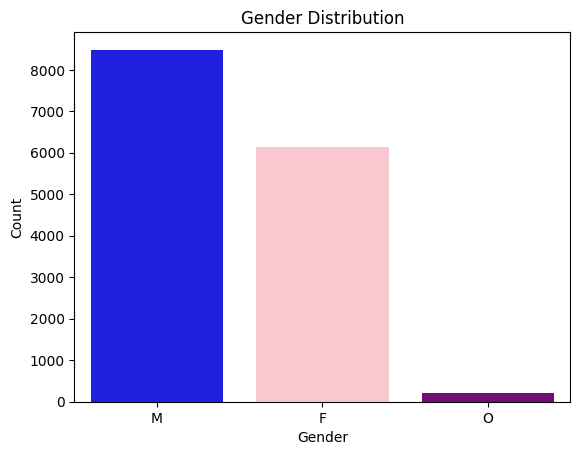

In [162]:
#Print the gender's distribution in a bar plot
# Create a custom color palette for the genders
color_palette = ['blue', 'pink', 'purple']

# Plot the gender distribution with the custom color palette
sns.countplot(x='gender', data=profile, order=['M', 'F', 'O'], palette=color_palette)

# Add title and labels
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")

# Show the plot
plt.show()

The analysis reveals that the majority of customers are male (49.91%), followed by female (36.05%), with a small percentage identifying as other (1.25%). 
This indicates a significant portion of the gender data is either missing or skewed, as the percentages do not add up to 100%. 

In [163]:
# Group the dataset by gender and calculate the mean age for each group
average_age_by_gender = profile.groupby('gender')['age'].mean()
print(average_age_by_gender)


gender
F    57.544950
M    52.116690
O    54.400943
Name: age, dtype: float64


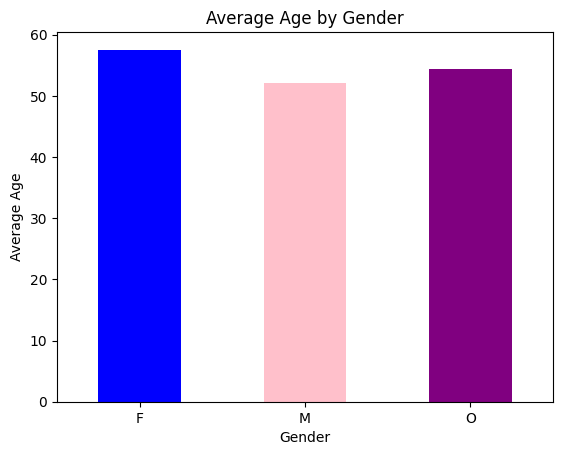

In [164]:
#Create a custom color palette
color_palette = ['blue', 'pink', 'purple']

# Create a bar plot
average_age_by_gender.plot(kind='bar', color = color_palette)

# Add labels and title
plt.title('Average Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Age')

# Show the plot
plt.xticks(rotation=0)  # Ensure labels are horizontal
plt.show()


The average age of customers varies slightly by gender: females have the highest average age at 57.54 years, followed by those identifying as other at 54.40 years, and males with an average age of 52.12 years. This, combined with the distribution percentages (49.91% male, 36.05% female, 1.25% other), indicates a predominance of slightly younger male customers compared to females and others in the dataset.

In [165]:
#Check dataframe's columns
profile.head(1)

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN


In [166]:
#Rename 'id' column into 'customer_id'
profile.rename(columns={"id":"customer_id"},inplace=True)

In [167]:
#Convert the string containg the date a user became memeber into datetime64 format.
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'],format = "%Y%m%d")

In [168]:
# Calculate the count of users by year
date_counts = profile['became_member_on'].dt.year.value_counts().sort_index()

# Calculate the percentage for each year
total_users = date_counts.sum()
percentage_by_year = (date_counts / total_users) * 100

# Round the percentages to 2 decimals and add the '%' symbol
percentage_by_year = percentage_by_year.round(2).astype(str) + '%'

# Combine the counts and percentages into a DataFrame for better readability
user_data = pd.DataFrame({
    'Total Users': date_counts,
    'Percentage': percentage_by_year
})

# Print the result
print(user_data)



                  Total Users Percentage
became_member_on                        
2013                      286      1.68%
2014                      691      4.06%
2015                     1830     10.76%
2016                     3526     20.74%
2017                     6469     38.05%
2018                     4198     24.69%


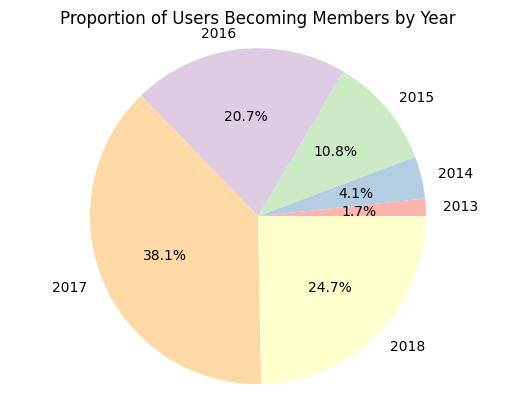

In [169]:
# Create a pie chart
plt.pie(date_counts.values, 
        labels=date_counts.index, 
        autopct='%1.1f%%', 
         colors=plt.cm.Pastel1.colors)  

# Add title
plt.title('Proportion of Users Becoming Members by Year')

# Show the plot
plt.axis('equal') 
plt.show()

Based on the data, we can observe the following trends in the number of users who became members of Starbucks:

The year with the highest membership growth was 2017, with 6,469 new users, making up 38.05% of the total users.
The number of new members sharply increased from 2013 to 2017, with a significant growth in 2016 (3,526 users, 20.74%).
2018 also had a notable number of new members (4,198 users, 24.69%), indicating continued growth.
Earlier years like 2013 and 2014 had fewer users, accounting for 1.68% and 4.06% respectively.
This suggests that the membership program saw accelerated adoption starting around 2015, with the peak in 2017.

## Analyzing 'transcript' dataset
This dataset contains information of transactions, offers received, offers viewed, and offers completed for each member.
Combining this dataset with the profile dataset will help us later to understand how offers and users are relatend.

In [170]:
#Check dataset
transcript.head(5)

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [171]:
#Check for null values
transcript.isna().sum()

person    0
event     0
value     0
time      0
dtype: int64

There are no null values in this dataset. This can seem a great, but we need to make sure that the data within the dataset makes sense and has enought quality to give valuable information.

In [172]:
# Get unique events and sort them
events = sorted(transcript['event'].unique())

# Print the sorted list of events
print("\n".join(events))

offer completed
offer received
offer viewed
transaction


There are 4 different events. Offer completed, offer recieved, offer viewed and transaction.
As said in the introduction of the practice, there's no need for the events to be completed in a sequence. For example, a customer can have a transaction event, without an offer recieved and an offer completed without an offer viewed.

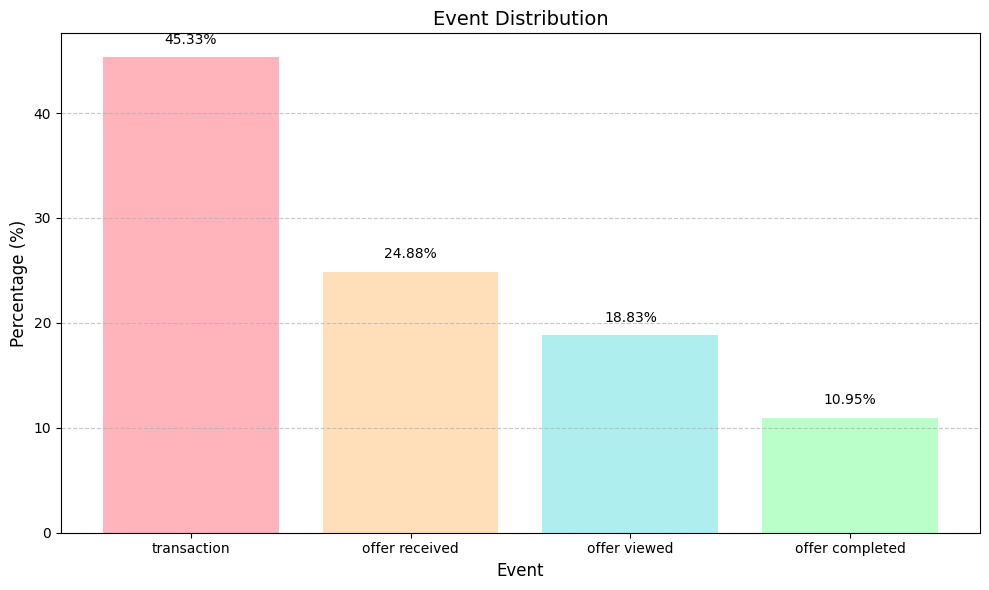

In [173]:
# Plotting the event distribution
event_counts = transcript['event'].value_counts()
event_percentages = {event: (count / len(transcript) * 100) for event, count in event_counts.items()}

#C olor pallette
pastel_colors = ['#ffb3ba', '#ffdfba', '#AFEEEE', '#baffc9', '#bae1ff']


# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size for better clarity
bars = plt.bar(event_percentages.keys(), event_percentages.values(), color=pastel_colors)

# Add percentage labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')

# Title and labels
plt.title('Event Distribution', fontsize=14)
plt.xlabel('Event', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# Add gridlines to make it easier to interpret
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to avoid clipping of labels
plt.tight_layout()

# Show the plot
plt.show()


In [174]:
# Print the percentage for each event
for key, value in event_percentages.items():
    print("Percentage of {} is {}%".format(key, round(value, 2)))

Percentage of transaction is 45.33%
Percentage of offer received is 24.88%
Percentage of offer viewed is 18.83%
Percentage of offer completed is 10.95%


The most common event is transaction, making up 45.33% of the total events, indicating that a significant portion of user activity is related to purchases.
Offer received follows closely with 24.88%, showing that nearly a quarter of users receive an offer.
Offer viewed accounts for 18.83%, suggesting that a majority of users view the offers they receive.
Finally, offer completed represents 10.95%, highlighting that less than 11% of users complete the offers they are presented with.

In [175]:
#Count each unique value in the column value
transcript['value'].value_counts()

value
{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}    14983
{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}    14924
{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}    14891
{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}    14835
{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'}    14374
                                                    ...  
{'amount': 42.31}                                       1
{'amount': 44.62}                                       1
{'amount': 42.27}                                       1
{'amount': 108.89}                                      1
{'amount': 476.33}                                      1
Name: count, Length: 5121, dtype: int64

In [176]:
def extract_values(val, key1, key2=None):
    """
    This function is designed to extract a value from a dictionary-like object (i.e., an object where data is stored as key-value pairs) based on one or two keys.    
    Args:
        Val: The dictionary or dictionary-like object where we will look for the key.
        key1: The primary key we will attempt to extract the value from.
        key2: An optional secondary key to look for if the first one is not found.
        
    Returns:
        The function returns the value associated with key1 if it's found, or if not found, it looks for key2 (if provided). If neither key is found, it returns None.    """
    
    # If key2 is provided, try to get the value using key1 first, if not found, then try key2.
    if key2:
        return val.get(key1) or val.get(key2)  # Returns value for key1 if found, else returns value for key2.
    else:
        # If key2 is not provided, only try to get the value for key1.
        return val.get(key1)  # Returns the value for key1 if found, otherwise None.

# This line creates a new column 'offer_id' by applying the extract_values function to the 'value' column.
# It looks for the 'offer_id' key in each value (assumed to be a dictionary), and if not found, looks for 'offer id'.
transcript['offer_id'] = transcript['value'].apply(extract_values, args=('offer_id', 'offer id'))

# This line creates a new column 'amount' by applying the extract_values function to the 'value' column.
# It looks for the 'amount' key in each value (assumed to be a dictionary).
transcript['amount'] = transcript['value'].apply(extract_values, args=('amount',))


In [177]:
#Count each unique value in the column amount
transcript['amount'].unique()

array([   nan,   0.83,  34.56, ..., 685.07, 405.04, 476.33])

Renaming the columns to prepare the dataframe to be merged.

In [178]:
# Renaming the columns
transcript.rename(columns={"offer id":"offer_id","person":"customer_id"},inplace=True)

## Analyzing 'portfolio' dataframe
Porfolio contains information regarding offers. Duration of the offers, type, etc.

In [179]:
#Check dataframe
portfolio.head(5)

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [180]:
#Check for null values
portfolio.isna().sum()

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

We will make further analysis with this dataframe later on.

# Data Cleaning

## Profile dataset
We will proceed to analyze the information in profile dataset, to understand more about Starbucks members.

In [181]:
# Check unique genders
profile['gender'].unique()

array([None, 'F', 'M', 'O'], dtype=object)

In [182]:
# Convert the 'gender' column into separate binary/dummy columns for each gender category
profile = pd.get_dummies(profile, columns=['gender'])

# Rename the generated dummy columns for better readability
profile.rename(
    columns={"gender_F": "female", "gender_M": "male", "gender_O": "other_gender"},
    inplace=True
)


In [183]:
# Check new columns
profile.head(5)

,age,customer_id,became_member_on,income,female,male,other_gender
0,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,False,False,False
1,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,True,False,False
2,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,False,False,False
3,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,True,False,False
4,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,False,False,False


#Age outliers
We will analyze 'Age' column and check if there are anomalies.

In [184]:
# Check information in the age column
profile['age'].describe()

count    17000.000000
mean        62.531412
std         26.738580
min         18.000000
25%         45.000000
50%         58.000000
75%         73.000000
max        118.000000
Name: age, dtype: float64

The dataset includes 17,000 customers with an average age of approximately 62.5 years. 
Ages range from 18 to 118. The upper limit of 118 is unusually high and doesn't make sense if we are speaking about ages. This may indicate potential data entry errors. 
Most customers are between 45 and 73 years old , with a median age of 58, reflecting a slightly older demographic overall. 
We have to address now the the validity of the maximum age value.

In [185]:
# Filter customers with an age of 118
profile_118 = profile[profile['age'] == 118]

# Check the filtered dataframe
profile_118.head(5)


,age,customer_id,became_member_on,income,female,male,other_gender
0,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,False,False,False
2,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,False,False,False
4,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,False,False,False
6,118,8ec6ce2a7e7949b1bf142def7d0e0586,2017-09-25,NaN,False,False,False
7,118,68617ca6246f4fbc85e91a2a49552598,2017-10-02,NaN,False,False,False


In [186]:
# Count the total number of entries where age is 118
total_118 = (profile['age'] == 118).sum()

print(f"Total number of entries with an age of 118: {total_118}")


Total number of entries with an age of 118: 2175


In [187]:
# Check empty records in the rows where there's an age equal to 118
missing_values = profile_118.isna().sum()

# Display the total count of missing values for each column
missing_values

age                    0
customer_id            0
became_member_on       0
income              2175
female                 0
male                   0
other_gender           0
dtype: int64

The dataset shows that there are 2175 missing values in the income column for users with an age of 118. 
However, there are no missing values in other columns. 

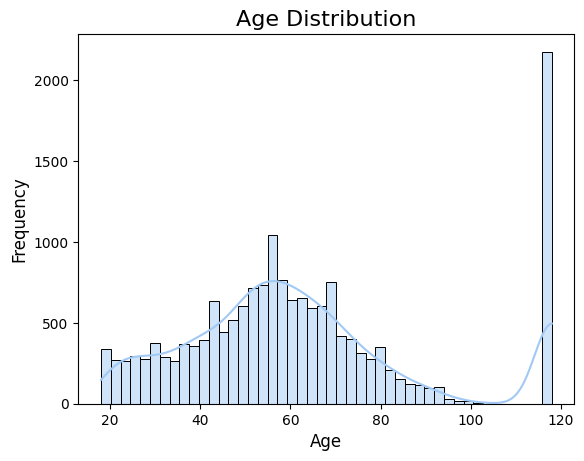

In [189]:
# Set a pastel color palette
sns.set_palette("pastel")

# Plotting the histogram of age with pastel color
# Added kde for a smoother curve
sns.histplot(profile['age'], kde=True)  
plt.title("Age Distribution", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)  

# Show the plot
plt.show()

The age of 118 appears to be an outlier, as it is highly unusual and likely a data entry error. To get a clean dataset, we will replace this values for NaN values. This will ensure the dataset accurately reflects valid customer ages.

In [190]:
# Replace the age of 118 with NaN to address the outlier
profile['age'] = profile['age'].replace(118, np.nan)


In [191]:
# # Filter the dataset to find all records where the age is 118
age_118_records = profile[profile['age'] == 118]

# Display the number of records with age 118 for further investigation
print(f"Found {len(age_118_records)} records with age 118.")

Found 0 records with age 118.


Now we don't have outliers in the age column.
To have a clean dataset we'll need to drop the Nan values.

In [192]:
# Dropping values with NaN
profile.dropna(inplace=True)

#Age clusters

We’re going to divide the age column into different groups or "bins" to better understand the different age ranges of our customers. We’ll categorize the ages into three main groups:

Young Adult (18-25 years old): This group includes customers who are between 18 and 25 years old.
Adult (26-65 years old): This group includes customers who are between 26 and 65 years old.
Senior (65 years and older): This group includes customers who are 65 years old or older.
Each group will be assigned a number:

Young Adult will be labeled as 1.
Adult will be labeled as 2.
Senior will be labeled as 3.
This way, we can quickly categorize our customers into these three groups for better analysis.

In [193]:
# Step 1: Define bins based on age categories
# The `min()` and `max()` functions get the minimum and maximum ages from the 'age' column to ensure all ages are included.
bins = [profile['age'].min(), 25, 65, profile['age'].max() + 1]  
labels = ['young_adult', 'adult', 'senior']  

# Step 2: Create a new column 'age_category' that assigns each customer to an age group based on the 'bins' and 'labels'.
profile['age_category'] = pd.cut(profile['age'], bins=bins, labels=labels, include_lowest=True)

# Step 3: Ensure the 'age_category' column is a categorical variable.
profile['age_category'] = pd.Categorical(profile['age_category'], categories=labels, ordered=True)

# Step 4: Map the age group categories to numerical values for easier analysis.
age_map_values = {'young_adult': 1, 'adult': 2, 'senior': 3}
profile['age_bins'] = profile['age_category'].map(age_map_values)


Since the 'age_bins' column already holds the numerical representation of the age groups, we no longer need the original 'age' and 'age_category' columns.


In [194]:
# Drop the 'age' and 'age_category' columns from the profile dataframe
profile.drop(['age','age_category'],axis=1,inplace=True)

In [195]:
#Check dataframe
profile.head(5)

,customer_id,became_member_on,income,female,male,other_gender,age_bins
1,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,True,False,False,2
3,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,True,False,False,3
5,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,False,True,False,3
8,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,False,True,False,2
12,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,False,True,False,2


In [196]:
# Check the weight of each age bin in the dataset
age_bin_counts = profile['age_bins'].value_counts()

# Display the counts for each bin
print(age_bin_counts)


age_bins
2    9827
3    3986
1    1012
Name: count, dtype: int64


The distribution of users across the age groups is as follows:

Adult (Age 25-65): 9827 users (the majority of the dataset).
Senior (Age 65 and older): 3986 users.
Young Adult (Age 18-25): 1012 users (the smallest group).

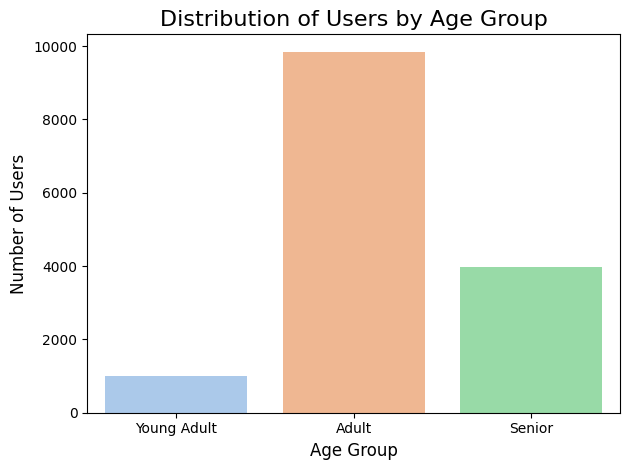

In [198]:
# Create a bar plot for the distribution of age bins
sns.countplot(x='age_bins', data=profile, palette="pastel", order=[1, 2, 3])

# Customize the plot
plt.title('Distribution of Users by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.xticks([0, 1, 2], ['Young Adult', 'Adult', 'Senior'], rotation=0)

# Display the plot
plt.tight_layout()
plt.show()


#Income clústers

We will categorize users based on their income into three distinct bins to better understand their financial profile. This will help us segment the users and analyze their behavior more effectively. The categories are:

Moderate (1): Users with a relatively low to medium income level.
Good (2): Users with a mid to high income level.
Excellent (3): Users with a high income level.

In [199]:
# Check for missing values in 'income' column
profile['income'].isna().sum()

# Define income bins and labels
income_bins = [0, 30000, 70000, profile['income'].max()] 
income_labels = ['moderate', 'good', 'excellent']

# Create a new column for income categories
profile['income_labels'] = pd.cut(profile['income'], bins=income_bins, labels=income_labels, include_lowest=True)

# Assigning numerical values to income categories
income_map_values = {'moderate': 1, 'good': 2, 'excellent': 3}
profile['income_bins'] = profile['income_labels'].map(income_map_values)

# Check the result
profile[['income', 'income_labels', 'income_bins']].head()



,income,income_labels,income_bins
1,112000.0,excellent,3
3,100000.0,excellent,3
5,70000.0,good,2
8,53000.0,good,2
12,51000.0,good,2


In [201]:
# Check income values, income categories, and numerical bins
profile[['income','income_labels','income_bins']].head(5)

,income,income_labels,income_bins
1,112000.0,excellent,3
3,100000.0,excellent,3
5,70000.0,good,2
8,53000.0,good,2
12,51000.0,good,2


In [202]:
# Dropping income and income_labels column
profile.drop(['income_labels','income'],inplace=True,axis=1)

In [203]:
# Check dataframe
profile.head(5)

,customer_id,became_member_on,female,male,other_gender,age_bins,income_bins
1,0610b486422d4921ae7d2bf64640c50b,2017-07-15,True,False,False,2,3
3,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,True,False,False,3,3
5,e2127556f4f64592b11af22de27a7932,2018-04-26,False,True,False,3,2
8,389bc3fa690240e798340f5a15918d5c,2018-02-09,False,True,False,2,2
12,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,False,True,False,2,2


In [204]:
# Check the distribution of the different income bins in the entire dataset
income_bin_counts = profile['income_bins'].value_counts()

print(income_bin_counts)


income_bins
2    8952
3    5785
1      88
Name: count, dtype: int64


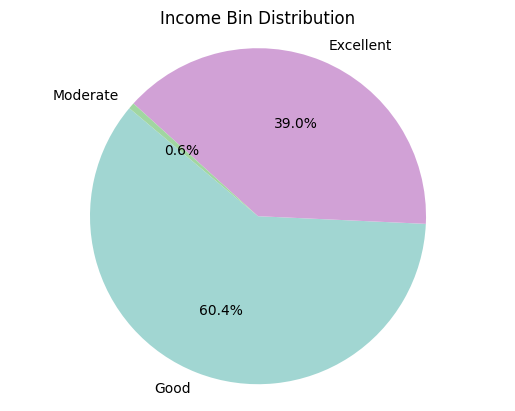

In [205]:
# Count the number of users in each income bin
income_bin_counts = profile['income_bins'].value_counts()

# Define labels for the bins
income_bin_labels = {1: 'Moderate', 2: 'Good', 3: 'Excellent'}

# Create the pie chart
plt.pie(income_bin_counts, labels=[income_bin_labels[val] for val in income_bin_counts.index], 
        autopct='%1.1f%%', startangle=140, colors=['#A1D6D2', '#D1A1D6', '#A1D6A1'])

# Add a title
plt.title('Income Bin Distribution')

# Display the pie chart
plt.axis('equal') 
plt.show()


The dataset shows the distribution of users across different income bins as follows:

Good income (bin 2): 8952 users (around 55.1% of the total users)
Excellent income (bin 3): 5785 users (approximately 35.9% of the total users)
Moderate income (bin 1): 88 users (only 0.5% of the total users)

This suggests that the majority of users fall into the "Good" and "Excellent" income categories, while only a small proportion of users belong to the "Moderate" income category. 
The low count of users in the "Moderate" income bin might be an anomaly, or it could suggest that the dataset is skewed toward users with higher incomes. 

### Membership seniority
Now we will explore the membership seniority of the users.

In [206]:
# Check data form
profile['became_member_on'].head(5)

1    2017-07-15
3    2017-05-09
5    2018-04-26
8    2018-02-09
12   2017-11-11
Name: became_member_on, dtype: datetime64[ns]

Now we have a composed date YYYY-mm-dd. If we want to explore the average seniority, we need to extract year, month and day.

In [207]:
# Extract year 
profile['member_year'] = profile['became_member_on'].dt.year
# Extract month
profile['member_month'] = profile['became_member_on'].dt.month
# Extract day
profile['member_day'] = profile['became_member_on'].dt.day

In [208]:
# Check new columns
profile.head(5)

,customer_id,became_member_on,female,male,other_gender,age_bins,income_bins,member_year,member_month,member_day
1,0610b486422d4921ae7d2bf64640c50b,2017-07-15,True,False,False,2,3,2017,7,15
3,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,True,False,False,3,3,2017,5,9
5,e2127556f4f64592b11af22de27a7932,2018-04-26,False,True,False,3,2,2018,4,26
8,389bc3fa690240e798340f5a15918d5c,2018-02-09,False,True,False,2,2,2018,2,9
12,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,False,True,False,2,2,2017,11,11


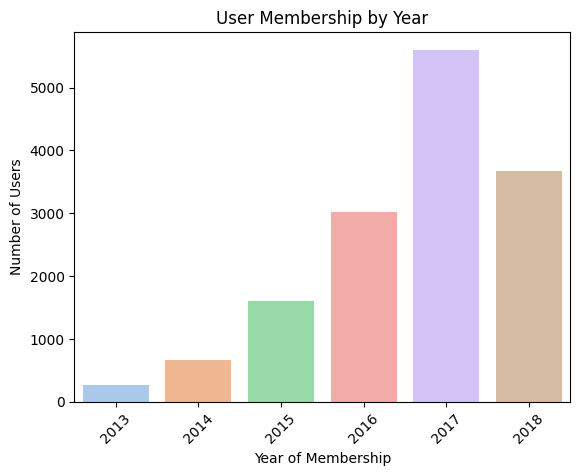

In [209]:
# Count of users by year of membership
membership_by_year = profile['member_year'].value_counts().sort_index()

# Number of users joining per year
sns.countplot(x='member_year', data=profile, palette='pastel')
plt.title('User Membership by Year')
plt.xlabel('Year of Membership')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()


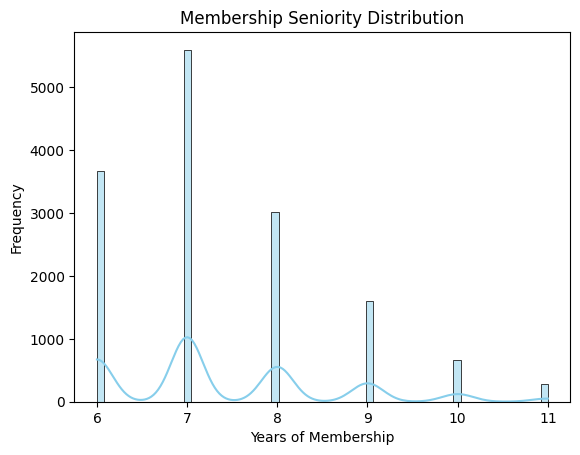

In [210]:
# Calculate the membership seniority in years
profile['membership_seniority'] = 2024 - profile['member_year'] 

# Check the distribution of membership seniority
sns.histplot(profile['membership_seniority'], kde=True, color='skyblue')
plt.title('Membership Seniority Distribution')
plt.xlabel('Years of Membership')
plt.ylabel('Frequency')
plt.show()


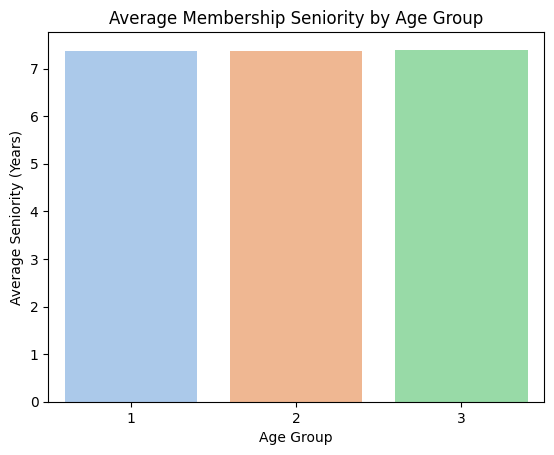

In [212]:
# Group by age category and calculate the average membership seniority
average_seniority_by_age = profile.groupby('age_bins')['membership_seniority'].mean()

# Plotting the average seniority by age group
sns.barplot(x=average_seniority_by_age.index, y=average_seniority_by_age.values, palette='pastel')
plt.title('Average Membership Seniority by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Seniority (Years)')
plt.xticks
plt.show()


There are no significant differences in seniority regarding age clusters.

## Portfolio Dataset

In [213]:
# Check dataframe
portfolio.head(5)

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [214]:
# Create a copy to test some changes
portfolio_test = portfolio.copy()

In [215]:
# Check new dataframe
portfolio_test.head(5)

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


Expanding the channels column values to create new with those values as there are multiple entries which later helps us to avoid numerical bias

In [216]:
# Expanding the 'channels' column into separate columns
expanded_channels = portfolio_test['channels'].apply(pd.Series)

#Stack the columns to turn lists into a single column
stacked_channels = expanded_channels.stack()

# Create dummy variables for each unique channel
channel_dummies = pd.get_dummies(stacked_channels)

# Group by the original index and sum the dummy columns 
channels_expanded = channel_dummies.groupby(level=0).sum()

In [217]:
# Check DataFrame
channels_expanded.head(5)

,email,mobile,social,web
0,1,1,1,0
1,1,1,1,1
2,1,1,0,1
3,1,1,0,1
4,1,0,0,1


In [218]:
# Join the original dataframe with the new columns for each channel
portfolio_test = pd.concat([portfolio_test,channels_expanded],axis=1)
portfolio_test.head(5)

,reward,channels,difficulty,duration,offer_type,id,email,mobile,social,web
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1


In [219]:
# Dropping the channels column
portfolio_test.drop('channels',inplace=True,axis=1)

In [220]:
# Check columns
portfolio_test.head(5)

,reward,difficulty,duration,offer_type,id,email,mobile,social,web
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1


## Preprocessing offer_type column

Creating dummy variables for offer_type

In [221]:
#portfolio_test = pd.concat([portfolio_test,pd.get_dummies(portfolio_test['offer_type'])],axis=1)

# Creating dummy variables for 'offer_type' and concatenating them to the portfolio_test DataFrame
portfolio_test = pd.concat([
    portfolio_test,
    pd.get_dummies(portfolio_test['offer_type'], drop_first=True) 
], axis=1)  

# Drop the original 'offer_type' column if it's no longer needed
portfolio_test.drop(columns=['offer_type'], inplace=True)


In [222]:
# Re-ordering the columns
portfolio_test=portfolio_test.reindex(columns=['id', 'difficulty', 'duration', 'reward', 'email', 'mobile', 'social',
                                        'web', 'bogo', 'discount', 'informational'])
portfolio_test.head(5)

,id,difficulty,duration,reward,email,mobile,social,web,bogo,discount,informational
0,ae264e3637204a6fb9bb56bc8210ddfd,10,7,10,1,1,1,0,NaN,False,False
1,4d5c57ea9a6940dd891ad53e9dbe8da0,10,5,10,1,1,1,1,NaN,False,False
2,3f207df678b143eea3cee63160fa8bed,0,4,0,1,1,0,1,NaN,False,True
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,7,5,1,1,0,1,NaN,False,False
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,20,10,5,1,0,0,1,NaN,True,False


In [223]:
# Rename columns. Preparing to merge dataframes
portfolio_test.rename(columns={"id":"offer_id"},inplace=True)

In [224]:
portfolio = portfolio_test.copy()

## Transcript dataset
We will work on separing the different events.

In [226]:
transcript.head(5)

,customer_id,event,value,time,offer_id,amount
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,2906b810c7d4411798c6938adc9daaa5,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN


In [227]:
# Dropping the value column since we have already expanded in an EDA section
transcript.drop('value',axis=1,inplace=True)

We are filtering out transaction events because they don’t help us understand how customers interact with offers. We also remove 'offer received' events because we’re mainly interested in seeing if customers viewed or completed the offers.

In [228]:
# Check data type in each column
transcript.dtypes

customer_id     object
event           object
time             int64
offer_id        object
amount         float64
dtype: object

In [229]:
# Check unique values in amount column
transcript['amount'].unique()

array([   nan,   0.83,  34.56, ..., 685.07, 405.04, 476.33])

In [230]:
# Filter transactions and offers recieved
transcript = transcript[transcript['event'] != 'transaction']
transcript = transcript[transcript['event'] != 'offer received']

In [232]:
# Check dataframe 
profile.head(5)

,customer_id,became_member_on,female,male,other_gender,age_bins,income_bins,member_year,member_month,member_day,membership_seniority
1,0610b486422d4921ae7d2bf64640c50b,2017-07-15,True,False,False,2,3,2017,7,15,7
3,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,True,False,False,3,3,2017,5,9,7
5,e2127556f4f64592b11af22de27a7932,2018-04-26,False,True,False,3,2,2018,4,26,6
8,389bc3fa690240e798340f5a15918d5c,2018-02-09,False,True,False,2,2,2018,2,9,6
12,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,False,True,False,2,2,2017,11,11,7


In [235]:
# Check data type
profile.dtypes

customer_id                     object
became_member_on        datetime64[ns]
female                            bool
male                              bool
other_gender                      bool
age_bins                      category
income_bins                   category
member_year                      int32
member_month                     int32
member_day                       int32
membership_seniority             int32
dtype: object

In [237]:
# Columns that can be converted to integer
profile_columns_to_convert = ['male', 'female', 'other_gender']
portfolio_columns_to_convert = ['email', 'mobile', 'social', 'web', 'bogo', 'discount']


In [238]:
# Fill NaN values with 0 for these columns in both dataframes
profile[profile_columns_to_convert] = profile[profile_columns_to_convert].fillna(0).astype("int64")
portfolio[portfolio_columns_to_convert] = portfolio[portfolio_columns_to_convert].fillna(0).astype("int64")

In [240]:
# Drop rows with NaN values in the specified columns
profile = profile.dropna(subset=profile_columns_to_convert)
portfolio = portfolio.dropna(subset=portfolio_columns_to_convert)

# Then convert to int64
profile[profile_columns_to_convert] = profile[profile_columns_to_convert].astype("int64")
portfolio[portfolio_columns_to_convert] = portfolio[portfolio_columns_to_convert].astype("int64")


## Merging all datasets


In [242]:
# Merging 'transcript' dataset with 'portfolio' on 'offer_id'
df_h = transcript.merge(portfolio,how='left',on='offer_id')

In [243]:
# Joining 'df' dataset with 'profile' on 'customer_id'
df = df_h.merge(profile, on = 'customer_id')

In [244]:
# New column with binary values that corresponds with the values in event column
df['event_result'] = (df['event'] == 'offer completed').astype(int)
df['event_result'] = df['event_result'].fillna(0)

In [245]:
df.head(5)

,customer_id,event,time,offer_id,amount,difficulty,duration,reward,email,mobile,...,female,male,other_gender,age_bins,income_bins,member_year,member_month,member_day,membership_seniority,event_result
0,389bc3fa690240e798340f5a15918d5c,offer viewed,0,f19421c1d4aa40978ebb69ca19b0e20d,NaN,5,5,5,1,1,...,0,1,0,2,2,2018,2,9,6,0
1,389bc3fa690240e798340f5a15918d5c,offer completed,60,f19421c1d4aa40978ebb69ca19b0e20d,NaN,5,5,5,1,1,...,0,1,0,2,2,2018,2,9,6,1
2,389bc3fa690240e798340f5a15918d5c,offer viewed,192,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5,7,5,1,1,...,0,1,0,2,2,2018,2,9,6,0
3,389bc3fa690240e798340f5a15918d5c,offer viewed,354,2906b810c7d4411798c6938adc9daaa5,NaN,10,7,2,1,1,...,0,1,0,2,2,2018,2,9,6,0
4,389bc3fa690240e798340f5a15918d5c,offer viewed,438,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5,7,5,1,1,...,0,1,0,2,2,2018,2,9,6,0


# Data Modeling
### Aim
We want to predict whether a customer will complete an offer (like buying a product or using a discount) when they receive a promotion. The question is whether the customer will take action (complete the offer) or not (ignore the offer). This is a classification problem because we're trying to categorize the outcome into one of two possible categories: "Offer Completed" or "Offer Not Completed".

### Algorithms we'll use:

1. Random Forest:
This method builds multiple models (called decision trees) and combines their predictions. It’s like asking a group of decision-makers and taking the majority opinion. It's good for making accurate predictions even when data is complex.

2. Naive Bayes:
This algorithm is based on probability. It looks at the features (like age, income, etc.) of a customer and calculates how the probability that the customer will complete the offer. It assumes that each feature is independent of the others (which is why it's called "naive").

3. Logistic Regression:
Classification method. It looks at the relationship between the features and the outcome, using an equation to predict the probability of a customer completing the offer.

4. Decision Tree:
A decision tree is like a flowchart. It asks questions about the features (like "Is the customer over 30 years old?") and makes decisions based on answers. The tree keeps branching out until it classifies the customer as either completing or not completing the offer.

5. Support Vector Machines (SVM):
This algorithm tries to find the "best line" (or hyperplane) that divides the data into two classes (completed offer vs. not completed offer). It tries to maximize the margin between the classes. It's powerful for handling complex data, especially when the classes are not clearly separable.

6. K-Nearest Neighbors (KNN):
This algorithm looks at the closest data points (neighbors) to a customer and classifies the customer based on what most of the neighbors did. For example, if most nearby customers completed the offer, the new customer is likely to complete it too.

### Steps We Will Take
Modeling:
First, we'll try all of these algorithms and see which one performs the best (example, gives us the highest accuracy at predicting whether a customer will complete an offer). This gives us a starting point.

Improving the Best Model:
Once we identify the best model (the one with the highest accuracy), we’ll improve it further. One way to do this is through hyperparameter tuning, which means adjusting the settings of the model to make it more accurate.

Each algorithm has its own strengths and is good for different types of data or problems, so we’ll test them all to see which works best for our specific case.

In [246]:
# Features: Select the columns that will be used as input features
X = df[['difficulty','reward','email','mobile','social','web','bogo','discount','informational','female','male','other_gender','age_bins','income_bins' ,'member_year','member_month']]

# Labels: Defining the target variable that we want to predict. 
y = df['event_result'].ravel()

# Split the data into training and testing sets. 30% for testing and 70% for training
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

In [247]:
# Minmax scaling of the data
scaler_x= MinMaxScaler()
scaler_y = MinMaxScaler()

# Apply MinMax scaling to the training data
X_train_min_max = scaler_x.fit_transform(X_train)
y_train_min_max = scaler_y.fit_transform(y_train.reshape(-1,1))

# Apply MinMax scaling to the test data
X_test_min_max = scaler_x.transform(X_test)
y_test_min_max = scaler_y.transform(y_test.reshape(-1,1))

# Baseline Modeling

The goal of this section is to evaluate the performance of different machine learning models in predicting customer responses to offers. 
We will compare the mentioned machine learning models on the dataset to determine which one performs the best, in terms of accuracy. 

- Accuracy measures how often the model makes correct predictions (percentage of correct predictions out of all predictions). It is computed as:
            
               Accuracy = Correct predictions / Total predictions

Afterwards, we will choose the best scoring models and will train each of them on the scaled training data. Then we'll test them on the scaled test data, and then calculate and store their accuracy scores to compare which model performs best.

In [248]:
# Define the models
all_models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}

# Dictionary to store the scores of each model
all_scores = dict()

for key, value in all_models.items():
    # Fit the model
    value.fit(X_train_min_max, y_train)
    
    # Calculate accuracy and store the result
    score = (value.score(X_test_min_max, y_test)) * 100
    all_scores[key] = score

# Return all the model accuracy scores
all_scores


{'Random Forest': 57.358658674874455,
 'Logistic Regression': 63.42945083427831,
 'SVM': 63.55499757006318,
 'Naive Bayes': 50.52243641665317,
 'Decision Tree': 57.28981046492792,
 'KNN': 57.64620119876883}

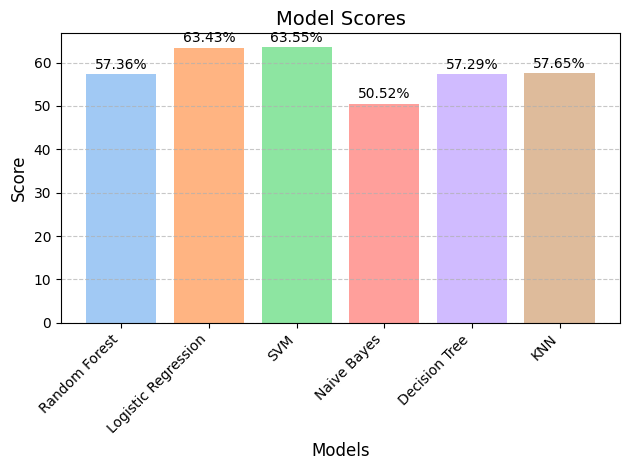

In [249]:
# Plot scores for each model
all_scores_df = pd.DataFrame.from_dict(all_scores, orient='index', columns=['Score'])
all_scores_df.index.name = 'Model'
pastel_colors = sns.color_palette("pastel", len(all_scores_df))
bars = plt.bar(all_scores_df.index, all_scores_df['Score'], color=pastel_colors)

# Labels
plt.xlabel('Models', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Title
plt.title('Model Scores', fontsize=14)

# Label with score value for each model
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f'{yval:.2f}%', ha='center', va='bottom', fontsize=10)

# Gridlines y axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Print plot
plt.tight_layout()
plt.show()


Based on the model scores, the highest-performing model for predicting customer responses to promotions is the Support Vector Machine (SVM), with an accuracy of approximately 63.55%. 
Logistic Regression follows with a score of 63.43%, while K-Nearest Neighbors (KNN) achieves 57.65%. 
Random Forest, Decision Tree, and Naive Bayes have relatively lower performance, with scores ranging between 50.52% and 57.30%. 

These results suggest that SVM and Logistic Regression are the most effective models for this task, while the other models may need further refinement or tuning.

**Code note**
In the development of the practice I tried an SVM model, which lasted more than 2 hours to perform (60 fittings). 
In order to make an quicker run of the notebook I shortened the test.
3 fold validation instead of 5.
Fewer values for SVC_C.
One value for SVC_Gamma.
Use of just linear kernel.

This is is the original code:

**Original SVM Model**

1.Create a pipeline
pipe = Pipeline([('scaler', MinMaxScaler()),
                 ('svc',SVC())])

2.Create space of candidate learning algorithms and their hyperparameters
param_grid = {'svc__C': [1, 10, 100],  
              'svc__gamma': [0.01, 0.001], 
              'svc__kernel': ['linear', 'sigmoid']}  

3.Create randomized search with 10-fold cross-validation and 20 iterations
clf = RandomizedSearchCV(pipe, param_grid, cv=5, n_iter=20, n_jobs=-1, verbose=2)  

4.Fit randomized search
best_model = clf.fit(X_train, y_train)

**Output**

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ......svc__C=1, svc__gamma=0.01, svc__kernel=linear; total time=  46.2s
[CV] END ......svc__C=1, svc__gamma=0.01, svc__kernel=linear; total time=  45.1s
[CV] END ......svc__C=1, svc__gamma=0.01, svc__kernel=linear; total time=  44.3s
[CV] END ......svc__C=1, svc__gamma=0.01, svc__kernel=linear; total time=  45.9s
[CV] END ......svc__C=1, svc__gamma=0.01, svc__kernel=linear; total time=  58.8s
[CV] END .....svc__C=1, svc__gamma=0.01, svc__kernel=sigmoid; total time= 1.8min
[CV] END .....svc__C=1, svc__gamma=0.01, svc__kernel=sigmoid; total time= 2.0min
[CV] END .....svc__C=1, svc__gamma=0.01, svc__kernel=sigmoid; total time= 1.8min
[CV] END .....svc__C=1, svc__gamma=0.01, svc__kernel=sigmoid; total time= 1.8min
[CV] END .....svc__C=1, svc__gamma=0.01, svc__kernel=sigmoid; total time= 1.8min
[CV] END .....svc__C=1, svc__gamma=0.001, svc__kernel=linear; total time=  46.9s
[CV] END .....svc__C=1, svc__gamma=0.001, svc__kernel=linear; total time=  43.0s
[CV] END .....svc__C=1, svc__gamma=0.001, svc__kernel=linear; total time=  42.1s
[CV] END .....svc__C=1, svc__gamma=0.001, svc__kernel=linear; total time=  44.8s
[CV] END .....svc__C=1, svc__gamma=0.001, svc__kernel=linear; total time=  59.8s
[CV] END ....svc__C=1, svc__gamma=0.001, svc__kernel=sigmoid; total time= 1.5min
[CV] END ....svc__C=1, svc__gamma=0.001, svc__kernel=sigmoid; total time= 1.4min
[CV] END ....svc__C=1, svc__gamma=0.001, svc__kernel=sigmoid; total time= 1.5min
[CV] END ....svc__C=1, svc__gamma=0.001, svc__kernel=sigmoid; total time= 1.5min
[CV] END ....svc__C=1, svc__gamma=0.001, svc__kernel=sigmoid; total time= 1.5min
[CV] END .....svc__C=10, svc__gamma=0.01, svc__kernel=linear; total time= 5.5min
[CV] END .....svc__C=10, svc__gamma=0.01, svc__kernel=linear; total time= 5.5min
[CV] END .....svc__C=10, svc__gamma=0.01, svc__kernel=linear; total time= 5.7min
[CV] END .....svc__C=10, svc__gamma=0.01, svc__kernel=linear; total time= 5.2min
[CV] END .....svc__C=10, svc__gamma=0.01, svc__kernel=linear; total time= 5.6min
[CV] END ....svc__C=10, svc__gamma=0.01, svc__kernel=sigmoid; total time= 1.8min
[CV] END ....svc__C=10, svc__gamma=0.01, svc__kernel=sigmoid; total time= 1.7min
[CV] END ....svc__C=10, svc__gamma=0.01, svc__kernel=sigmoid; total time= 1.7min
[CV] END ....svc__C=10, svc__gamma=0.01, svc__kernel=sigmoid; total time= 1.8min
[CV] END ....svc__C=10, svc__gamma=0.01, svc__kernel=sigmoid; total time= 1.8min
[CV] END ....svc__C=10, svc__gamma=0.001, svc__kernel=linear; total time= 5.4min
[CV] END ....svc__C=10, svc__gamma=0.001, svc__kernel=linear; total time= 5.4min
[CV] END ....svc__C=10, svc__gamma=0.001, svc__kernel=linear; total time= 5.7min
[CV] END ....svc__C=10, svc__gamma=0.001, svc__kernel=linear; total time= 5.1min
[CV] END ....svc__C=10, svc__gamma=0.001, svc__kernel=linear; total time= 5.5min
[CV] END ...svc__C=10, svc__gamma=0.001, svc__kernel=sigmoid; total time= 1.3min
[CV] END ...svc__C=10, svc__gamma=0.001, svc__kernel=sigmoid; total time= 1.2min
[CV] END ...svc__C=10, svc__gamma=0.001, svc__kernel=sigmoid; total time= 1.2min
[CV] END ...svc__C=10, svc__gamma=0.001, svc__kernel=sigmoid; total time= 1.3min
[CV] END ...svc__C=10, svc__gamma=0.001, svc__kernel=sigmoid; total time= 1.3min
[CV] END ....svc__C=100, svc__gamma=0.01, svc__kernel=linear; total time= 6.3min
[CV] END ....svc__C=100, svc__gamma=0.01, svc__kernel=linear; total time= 5.2min
[CV] END ....svc__C=100, svc__gamma=0.01, svc__kernel=linear; total time= 5.0min
[CV] END ....svc__C=100, svc__gamma=0.01, svc__kernel=linear; total time= 5.8min
[CV] END ....svc__C=100, svc__gamma=0.01, svc__kernel=linear; total time= 5.8min
[CV] END ...svc__C=100, svc__gamma=0.01, svc__kernel=sigmoid; total time= 2.0min
[CV] END ...svc__C=100, svc__gamma=0.01, svc__kernel=sigmoid; total time= 1.9min
[CV] END ...svc__C=100, svc__gamma=0.01, svc__kernel=sigmoid; total time= 2.1min
[CV] END ...svc__C=100, svc__gamma=0.01, svc__kernel=sigmoid; total time= 1.9min
[CV] END ...svc__C=100, svc__gamma=0.01, svc__kernel=sigmoid; total time= 2.0min
[CV] END ...svc__C=100, svc__gamma=0.001, svc__kernel=linear; total time= 6.5min
[CV] END ...svc__C=100, svc__gamma=0.001, svc__kernel=linear; total time= 5.3min
[CV] END ...svc__C=100, svc__gamma=0.001, svc__kernel=linear; total time= 5.0min
[CV] END ...svc__C=100, svc__gamma=0.001, svc__kernel=linear; total time= 6.0min
[CV] END ...svc__C=100, svc__gamma=0.001, svc__kernel=linear; total time= 5.8min
[CV] END ..svc__C=100, svc__gamma=0.001, svc__kernel=sigmoid; total time= 1.3min
[CV] END ..svc__C=100, svc__gamma=0.001, svc__kernel=sigmoid; total time= 1.3min
[CV] END ..svc__C=100, svc__gamma=0.001, svc__kernel=sigmoid; total time= 1.3min
[CV] END ..svc__C=100, svc__gamma=0.001, svc__kernel=sigmoid; total time= 1.3min
[CV] END ..svc__C=100, svc__gamma=0.001, svc__kernel=sigmoid; total time= 1.2min

**Original output for the hyperparameters tunning**
Best Hyperparameters:
 {'memory': None, 'steps': [('scaler', MinMaxScaler()), ('svc', SVC(C=1, gamma=0.01, kernel='linear'))], 'verbose': False, 'scaler': MinMaxScaler(), 'svc': SVC(C=1, gamma=0.01, kernel='linear'), 'scaler__clip': False, 'scaler__copy': True, 'scaler__feature_range': (0, 1), 'svc__C': 1, 'svc__break_ties': False, 'svc__cache_size': 200, 'svc__class_weight': None, 'svc__coef0': 0.0, 'svc__decision_function_shape': 'ovr', 'svc__degree': 3, 'svc__gamma': 0.01, 'svc__kernel': 'linear', 'svc__max_iter': -1, 'svc__probability': False, 'svc__random_state': None, 'svc__shrinking': True, 'svc__tol': 0.001, 'svc__verbose': False}
Best Score: 0.6333228865393972

In [250]:
# SVM Model with Faster Execution

# Create a pipeline with scaling and SVC
pipe = Pipeline([('scaler', MinMaxScaler()),
                 ('svc', SVC())])

# Reduce hyperparameter search space
param_grid = {
    'svc__C': [1, 10],  
    'svc__gamma': [0.01],  
    'svc__kernel': ['linear']  
}

# Create randomized search with 3-fold cross-validation and 5 iterations
clf = RandomizedSearchCV(pipe, param_grid, cv=3, n_iter=5, n_jobs=-1, verbose=2)

# Fit randomized search
best_model = clf.fit(X_train, y_train)


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END ......svc__C=1, svc__gamma=0.01, svc__kernel=linear; total time=  31.7s
[CV] END ......svc__C=1, svc__gamma=0.01, svc__kernel=linear; total time=  32.8s
[CV] END ......svc__C=1, svc__gamma=0.01, svc__kernel=linear; total time=  33.0s
[CV] END .....svc__C=10, svc__gamma=0.01, svc__kernel=linear; total time= 3.2min
[CV] END .....svc__C=10, svc__gamma=0.01, svc__kernel=linear; total time= 3.3min
[CV] END .....svc__C=10, svc__gamma=0.01, svc__kernel=linear; total time= 3.1min


Now we'll review the hyperparameters that produced the best model and the score that was achieved. 

This helps us to understand the configuration of the model that worked best and gives insights into its effectiveness.

In [ ]:
# Print the best hyperparameters 
best_hyperparams = best_model.best_estimator_.get_params()
print('Best Hyperparameters:\n', best_hyperparams)

# Print the best score 
best_score = best_model.best_score_
print('Best Score:', best_score)

The model achieved an accuracy of approximately 63.3%, which indicates it correctly predicted the outcome about two-thirds of the time.

In [ ]:
# LOGISTIC REGRESSION

# Define a pipeline that first scales the features using MinMaxScaler and then applies Logistic Regression
log_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('logreg', LogisticRegression())  
])

# Defining the hyperparameter grid for Logistic Regression
log_param_grid = {
    'logreg__C': uniform(loc=0, scale=2),  
    'logreg__penalty': ['l1', 'l2', 'elastic-net'],  
    'logreg__solver': ['newton-cg', 'liblinear']  
}

# Initialize RandomizedSearchCV for hyperparameter tuning
log_random_cv = RandomizedSearchCV(
    log_pipeline,  
    param_distributions=log_param_grid,  
    n_iter=30,  
    cv=3, 
    verbose=2,  
    n_jobs=-1,  
    random_state=42  
)

# Fitting the RandomizedSearchCV model on the training data
log_random_cv.fit(X_train, y_train)



In [ ]:
# Print the best hyperparameters 
print("Best Parameters: ", log_random_cv.best_params_)

# Print the best score obtained
print("Best Score: ", log_random_cv.best_score_)

The Logistic Regression model, with the best hyperparameters achieved a 63.37% accuracy. 


After trying to improve the Logistic Regression and SVM models by adjusting their settings (hyperparameter tuning), we didn't see any big changes in their performance. Sometimes, the default settings of a model are already quite good, and small changes don’t lead to better results. Even though we made changes to the settings, the accuracy of the models didn't improve much. This doesn't mean the models are bad; it just means the default settings were already doing a good job.

SVM and Logistic Regression have similar scores, so we're deciding to continue with the SVM model since it's performing just as well as the others.


## Classification Report
In order to  visualize the results of a classification report we will plot different heat maps. 
A classification report provides important metrics like precision, recall, F1-score, and support for each class. We decided to plot the classification report rather than present it in text form.

In [ ]:
# Make predictions using the trained classifier on the test data
y_pred = clf.predict(X_test)

# Calculate the confusion matrix, comparing true labels (y_test) and predicted labels (y_pred)
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
#plt.figure(figsize=(8, 6)) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')

# Add labels and title
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))

A confusion matrix for a binary classification problem has four values:

-True Positives (TP): The number of instances correctly classified as Class 1 (positive outcome).
-False Positives (FP): The number of instances incorrectly classified as Class 1 when they are actually Class 0.
-False Negatives (FN): The number of instances incorrectly classified as Class 0 when they are actually Class 1.
-True Negatives (TN): The number of instances correctly classified as Class 0 (negative outcome).

Our matrix shows:
-True Positives (TP): 3402 instances correctly predicted as Class 1.
-True Negatives (TN): 12282 instances correctly predicted as Class 0.
-False Positives (FP): 2784 instances incorrectly predicted as Class 1 (they should have been Class 0).
-False Negatives (FN): 6224 instances incorrectly predicted as Class 0 (they should have been Class 1).

The model correctly predicted 15684 instances, with strong performance on Class 0 (82% recall) but weaker results on Class 1 (35% recall). This indicates the model is better at identifying negative cases (Class 0) than positive cases (Class 1), leading to a bias towards Class 0 predictions.

To understand how well the model distinguishes between positives and negatives, we decide to explor the ROC Curve. The AUC (Area Under the Curve) summarizes this performance into a single score, where higher values (closer to 1) indicate a better-performing model.

In [ ]:
# Calculate the false positive rate and true positive rate
fpr, tpr, _ = roc_curve(y_test, y_pred)  

# Plotting the ROC Curve
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc(fpr, tpr):.2f})') 
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier') 

# Labels x and y axis.
plt.xlabel('False Positive Rate (FPR)', fontsize=12)  
plt.ylabel('True Positive Rate (TPR)', fontsize=12)  

#Title
plt.title('ROC Curve', fontsize=14)  
plt.legend(fontsize=10) 
plt.grid(True, linestyle='--', alpha=0.7)  

# Show plot
plt.show()

In [ ]:
# Calculate and print the Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr) 
print('AUC-ROC:', round(roc_auc * 100, 2))

An AUC-ROC score of 58.43 (out of 100) indicates that the model has a slightly better-than-random chance (50%) of correctly distinguishing between the two classes.
In essence, while the model shows potential, its classification ability is still weak and likely requires further refinement.

AUC-ROC: 58.43


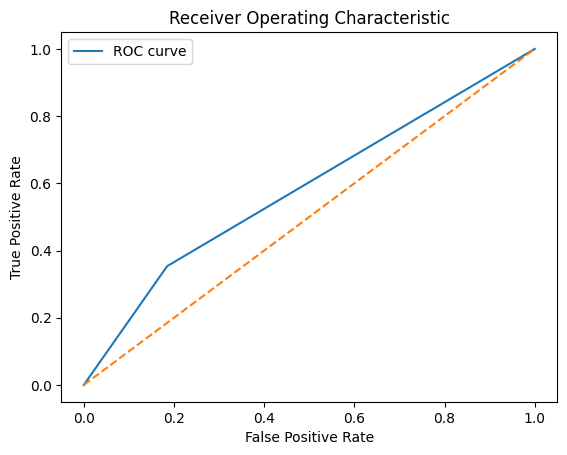

In [75]:
# ROC CURVE

# Calculate the false positive rand and true positive rate
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Plotting ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()

# Calculating and display AUC-ROC
roc_auc = auc(fpr, tpr)
print('AUC-ROC:',(round( roc_auc*100,2)))

 The AUC-ROC score is approximately 0.584. This indicates that our model has a modest ability to distinguish between the classes in your binary classification problem. In other words, given a random positive instance and a random negative instance, there's roughly a 58.4% chance that the model will rank the positive instance higher than the negative one.

#ANALYSIS CONCLUSION
In this project, I worked with datasets from Starbucks to create a model that predicts whether a customer will complete an offer after seeing it. I started by exploring the data to understand its structure and patterns. After that, I cleaned and prepared the data for modeling by creating new features that made the data easier to use. I also turned some columns into dummy variables to avoid bias in the model. This step took a lot of time and effort, as it involved cleaning and changing the data to make it ready for the next steps.

Based on the results from my model, it seems that predicting whether a customer will complete an offer after seeing it is still challenging. With an accuracy of around 63%, the model's predictions are not very strong, meaning it is not consistently accurate in determining whether a customer will engage with the offer.

In other words, the model can make some correct predictions, but it is not yet reliable enough for me to confidently predict customer behavior. To improve this, I could focus on enhancing the model by addressing issues like data imbalance, adding more relevant features, or experimenting with more advanced techniques like deep learning, which could lead to better results.

#RESOURCES
-1. Scikit-learn Algorithms information. https://scikit-learn.org/stable/
-2. Random forest classifier. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
-3. Logistic Refression. Details to implement and tume LR. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
https://www.youtube.com/watch?v=HYcXgN9HaTM
-4. SVM. Model and implementation. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html 
https://www.youtube.com/watch?v=_YPScrckx28
https://www.youtube.com/watch?v=7sz4WpkUIIs
-5. Naive Bayes. https://scikit-learn.org/stable/modules/naive_bayes.html
-6. Decision trees. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
-7. KNN. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
-8. Cross validation, grid search. https://scikit-learn.org/stable/modules/cross_validation.html
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
-9. ROC Curve. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
-10. Auc. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html
https://www.youtube.com/watch?v=TEkvKx2tQHU
https://www.youtube.com/watch?v=TmhzUdPpVPQ
-11. Pandas.https://pandas.pydata.org/pandas-docs/stable/
-12. Matplotlib.https://matplotlib.org/stable/contents.html
-13. Seaborn.https://seaborn.pydata.org/
-14. Others:
Categorical conversion. https://www.youtube.com/watch?v=fyHaUMX9y0A
Handling missing values. https://www.youtube.com/watch?v=uDr67HBIPz8
Confussion matrix. https://www.youtube.com/watch?v=H2M3fT1njXQ